In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path='/Users/z/Documents/CF/Unit 1/6. Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Gun Violence Project','02 Data/Prepared data','gun-violence-data_full.pkl'))

#### create new clean df

In [8]:
df.dtypes


incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [10]:
df2 = df[['n_killed','n_injured','n_guns_involved']].copy()

In [13]:
df2.shape

(239677, 3)

#### The Elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/z/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/z/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/z/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/z/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/z/anaconda3/lib/python3.10/si

[-3269935.0679047005,
 -1356478.8374080965,
 -748139.2608168639,
 -485012.68385307695,
 -394809.4304867212,
 -305059.33852228906,
 -248654.94979618423,
 -210685.13257997844,
 -173809.52937966865]

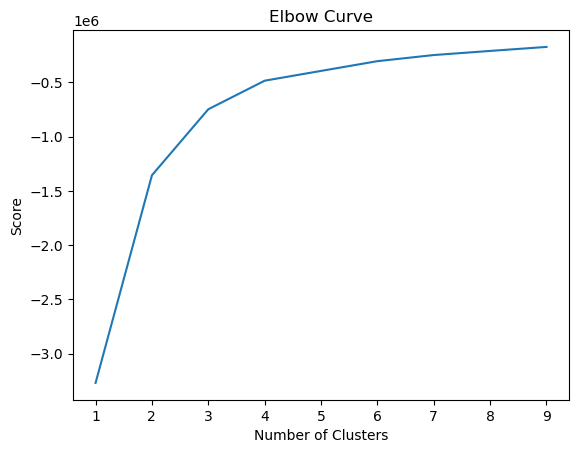

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I would choose 4 as a number since the spike seem to streighten after that

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df2)

/Users/z/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### attach new column for clusters

In [23]:
# create new cluster column
df2['clusters'] = kmeans.fit_predict(df2)

/Users/z/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# check output
df2.head()

,n_killed,n_injured,n_guns_involved,clusters
0,0,4,1.0,0
1,1,3,1.0,0
2,1,3,2.0,0
3,4,0,1.0,0
4,2,2,2.0,0


In [25]:
# count clusters
df2['clusters'].value_counts()

0    238898
2       721
1        43
3        15
Name: clusters, dtype: int64

### create new visualisations 

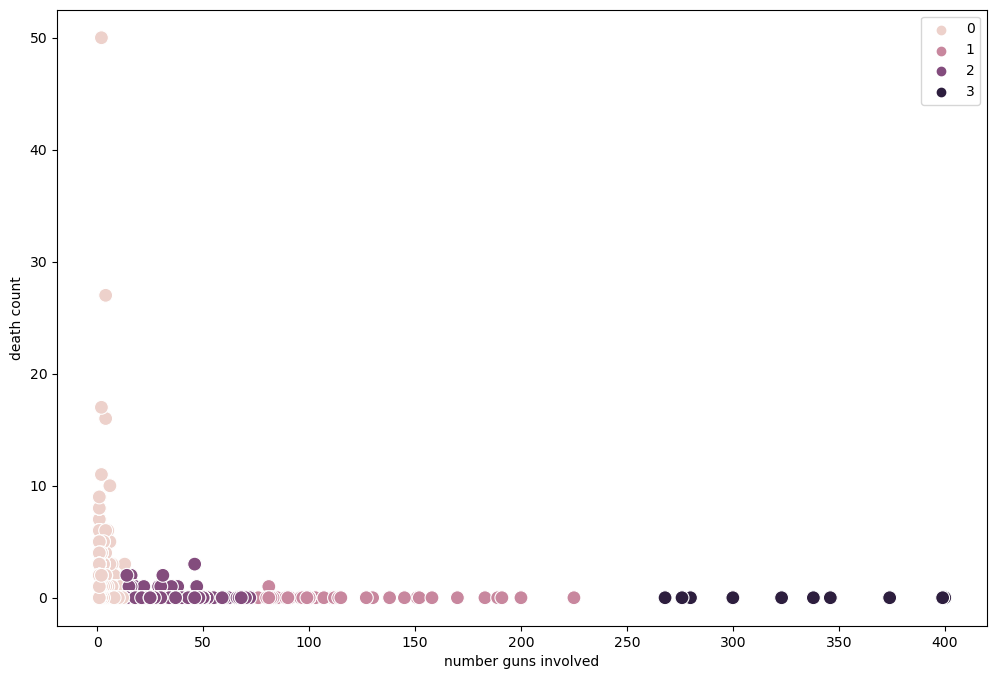

In [26]:
# Plot the clusters for the "n_killed" and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['n_guns_involved'], y=df['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number guns involved') # Label x-axis.
plt.ylabel('death count') # Label y-axis.
plt.show()

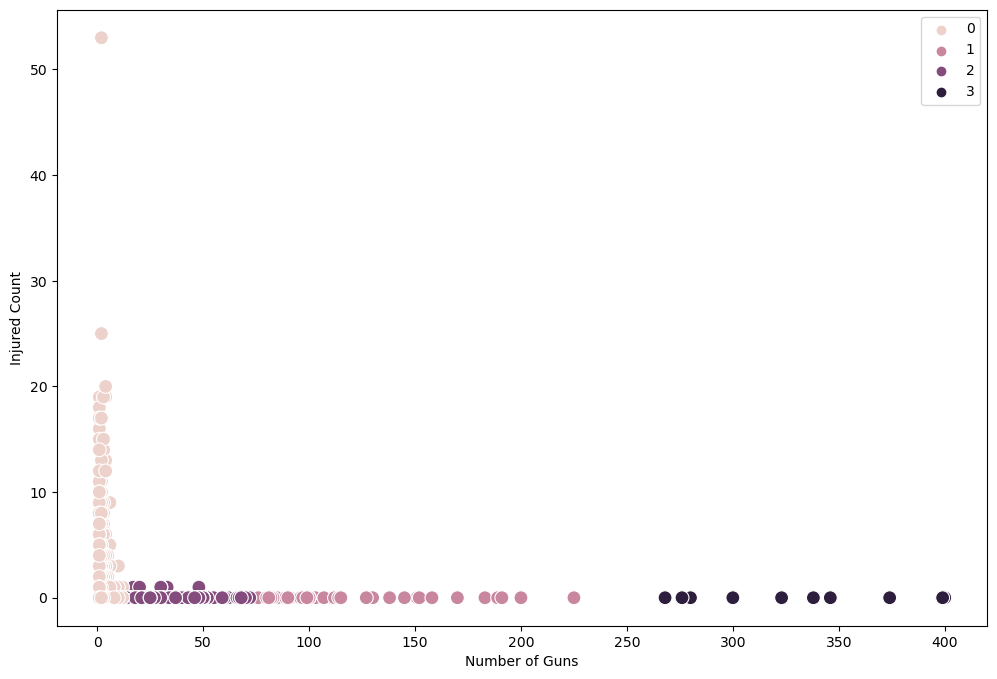

In [27]:
# Plot the clusters for the "n_guns_involved "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['n_guns_involved'], y=df['n_injured'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Guns') 
plt.ylabel('Injured Count') 
plt.show()

In [30]:
# group culsters
df2.groupby('clusters').agg({'n_guns_involved':['mean', 'median'], 
                         
                         'n_injured':['mean', 'median'],
                          'n_killed':['mean', 'median']})

n_guns_involved        n_injured         n_killed       
                    mean median      mean median      mean median
clusters                                                         
0               1.100294    1.0  0.495584    0.0  0.253028    0.0
1             120.720930  103.0  0.000000    0.0  0.023256    0.0
2              26.005548   22.0  0.011096    0.0  0.026352    0.0
3             340.266667  338.0  0.000000    0.0  0.000000    0.0